In [1]:
import pandas as pd
import numpy as np

In [2]:
airpass = pd.read_csv(r"C:\Users\rhuta\Downloads\AirPassengers.csv")

In [3]:
airpass

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
#PS is to forecast the passengers for the next 12 months ( for year 1961)
#Random sampling is crime
#Breaking the series is also a crime

In [5]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
#Converting to datetime
airpass.Month = pd.to_datetime(airpass.Month, infer_datetime_format = True)

In [7]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
airpass = airpass.set_index(['Month'])

In [9]:
airpass

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
#We will check if our series is stationary or not?

In [11]:
import matplotlib.pyplot as plt

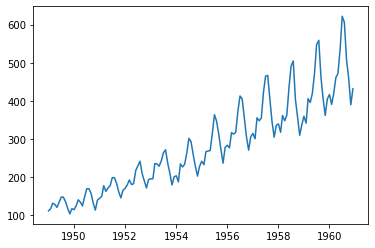

In [12]:
plt.plot(airpass)

In [13]:
#Series is not stationary and we have to make it stationary

In [14]:
airpass.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


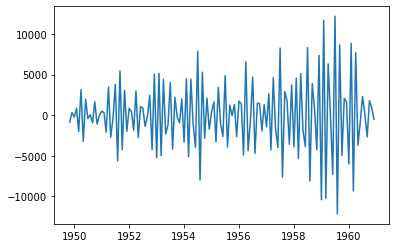

In [15]:
plt.plot(airpass.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())

In [16]:
#Even after multiple level of differencing series does not become stationary.

In [17]:
#We are going to take the log of the series.

In [18]:
airpass_log = np.log(airpass)

In [19]:
airpass_log

,Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


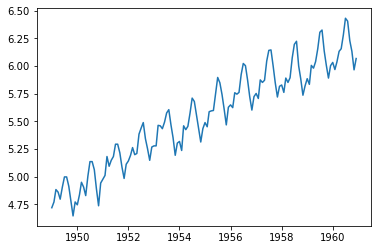

In [20]:
plt.plot(airpass_log)

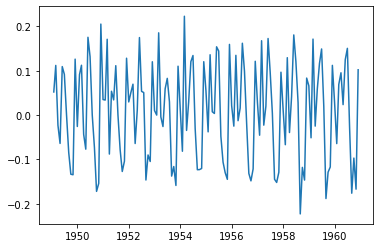

In [21]:
plt.plot(airpass_log.diff())

In [22]:
#After taking log and applying differencing technique we get the series stationary.

In [23]:
#for building a model we need 3 things p,d,q and we know p = ?, d = 1, q= ?

In [24]:
#to find p and q we use acf and pacf

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

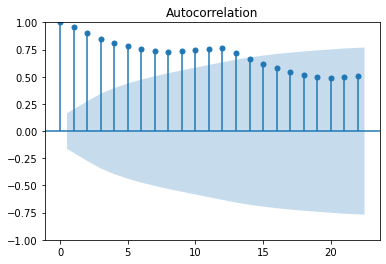

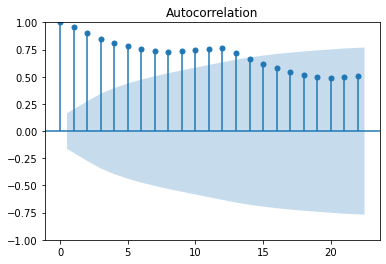

In [26]:
plot_acf(airpass_log) #Gradually decreasing

R:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


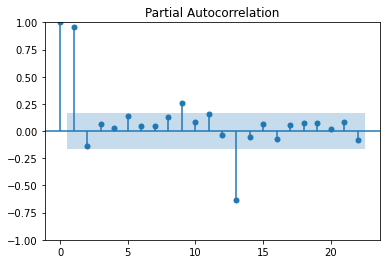

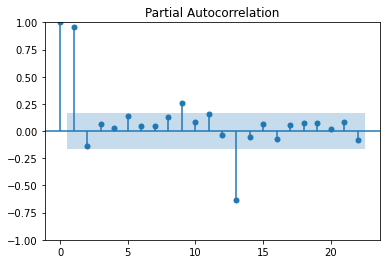

In [27]:
plot_pacf(airpass_log) #sharply decline

In [28]:
#When your ACF decline slowly or gradually and pacf declines sharply then we call it AR process.

In [29]:
#AR is mapped to p
#Here after 2 lags we are getting correlation = 0 so this is AR(2) process
#The value we got = (p = 2, d =1 , q = 0) # as q is mapped to MA so q and this AR so q = 0

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
#model = ARIMA(airpass_Log.Passengers , order = (2,1,0))

In [32]:
#How to use the SARIMA and SARIMAX?
# we will use auto_arima and whatever values we will get from auto arima we are going to pass it into our model.

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
!pip install pmdarima


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pmdarima
from pmdarima import auto_arima

In [37]:
result = seasonal_decompose(airpass_log)

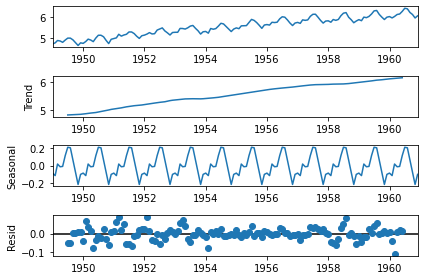

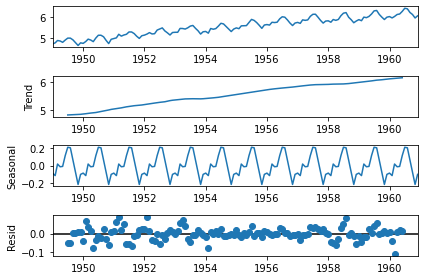

In [38]:
result.plot()

In [39]:
auto_arima(airpass_log , seasonal = True , m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [40]:
#Whatever values will get from auto_arima we will pass to SARIMAX

In [41]:
model_sarima = SARIMAX(airpass_log , order =(2,0,0), seasonal_order=(0,1,1,12))

R:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
R:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
airpass_model = model_sarima.fit()

In [43]:
pred_values = airpass_model.predict(start = 144, end = 155)

In [44]:
pred_values

1961-01-01    6.103822
1961-02-01    6.045802
1961-03-01    6.162537
1961-04-01    6.188896
1961-05-01    6.220920
1961-06-01    6.355879
1961-07-01    6.493185
1961-08-01    6.487557
1961-09-01    6.308106
1961-10-01    6.191223
1961-11-01    6.044477
1961-12-01    6.147807
Freq: MS, Name: predicted_mean, dtype: float64

In [45]:
pred_values1 = np.exp(pred_values)
pred_values1

1961-01-01    447.564956
1961-02-01    422.336495
1961-03-01    474.630799
1961-04-01    487.307857
1961-05-01    503.166122
1961-06-01    575.868019
1961-07-01    660.623949
1961-08-01    656.916665
1961-09-01    549.003994
1961-10-01    488.443114
1961-11-01    421.777226
1961-12-01    467.690792
Freq: MS, Name: predicted_mean, dtype: float64

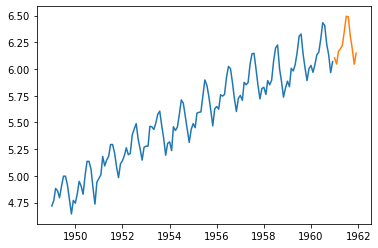

In [46]:
plt.plot(airpass_log)
plt.plot(pred_values)

In [47]:
df = pd.DataFrame()
df['Predicted'] = pred_values1
date_for_pred = ['1961-01-01' ,'1961-02-01', '1961-03-01', '1961-04-01' , '1961-05-01', '1961-06-01', '1961-07-01','1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01' ]
df['Month'] = date_for_pred

df.Month = pd.to_datetime(df.Month , infer_datetime_format = True)

df = df.set_index(['Month'])

In [48]:
df

,Predicted
Month,
1961-01-01,447.564956
1961-02-01,422.336495
1961-03-01,474.630799
1961-04-01,487.307857
1961-05-01,503.166122
1961-06-01,575.868019
1961-07-01,660.623949
1961-08-01,656.916665
1961-09-01,549.003994


<AxesSubplot:xlabel='Month'>

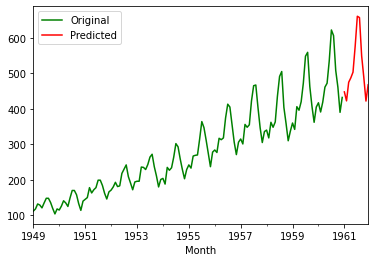

In [50]:
airpass['Passengers'].plot(legend = True , label = 'Original' , color = 'green')
df['Predicted'].plot(legend = True , label = 'Predicted' , color = 'red')